In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt 

In [2]:
img = cv2.imread('./test _images/002_6e289116.jpg')
img.shape

(474, 474, 3)

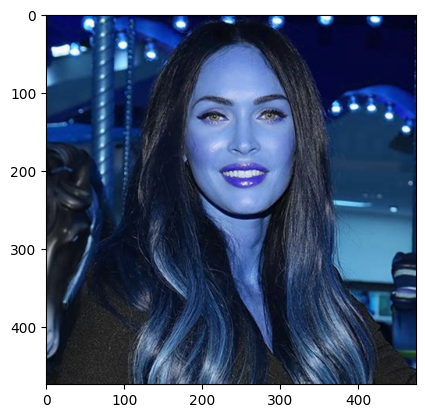

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # It removes the 3rd element in the array which is the rgb colors
gray.shape

(474, 474)

In [5]:
gray

array([[33, 33, 33, ..., 11, 23, 23],
       [33, 33, 33, ..., 12, 22, 22],
       [33, 33, 33, ..., 11, 17, 17],
       ...,
       [28, 32, 27, ..., 32, 42, 42],
       [69, 24, 22, ..., 32, 37, 68],
       [69, 24, 22, ..., 32, 37, 68]], shape=(474, 474), dtype=uint8)

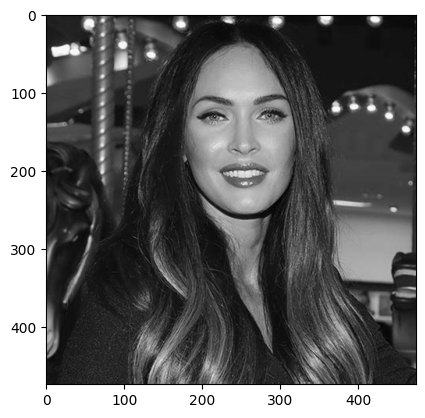

In [6]:
plt.imshow(gray, cmap='gray')

It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.
Here we will work with face detection. Initially, the algorithm needs a lot of positive images (images of faces) and negative images (images without faces) to train the classifier. Then we need to extract features from it.
it uses a moving window of these features (line and edge) to detect where is your nose where is your eyes

In [7]:
face_cascade = cv2.CascadeClassifier('./open_cv/haracascade_frontalface_default.xml.txt') # these are harrcascade xml that allows you to detect different features of the face
eye_cascade = cv2.CascadeClassifier('./open_cv/haracascade_eye.xml.txt')

faces = face_cascade.detectMultiScale(gray, 1.3, 5) # detect faces (certain feature) from the image. if it 2 faces it would return 2 arrays
faces 

# the array is the x y coordinates of where the face starts and the height and width

array([[161,  62, 181, 181]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(161), np.int32(62), np.int32(181), np.int32(181))

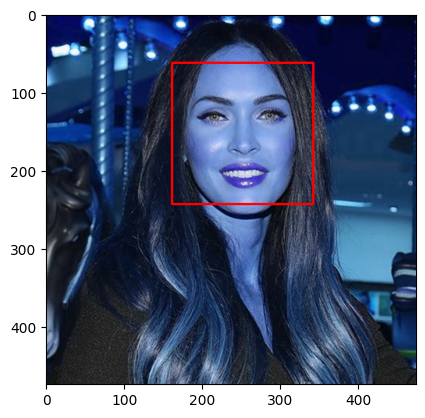

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w, y+h), (255, 0, 0), 2) # draw a rectangle on the image given the dimensions of the face
plt.imshow(face_img)

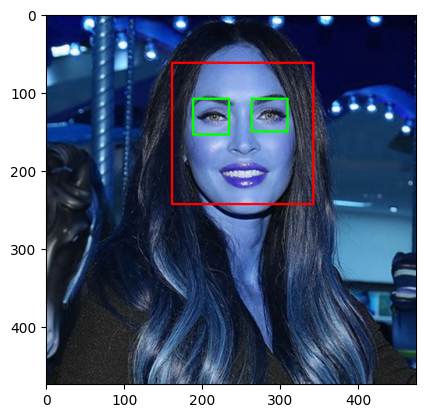

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces: # function to loop through images, in our case we onoy have one
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w] # rectangle of the face 
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes: # loops through the image, cuz it might have more than one eye
        cv2.rectangle(roi_color,(ex,ey),(ex+ey,ew+eh),(0,255,0),2) # draw green rectangle on the eyes

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


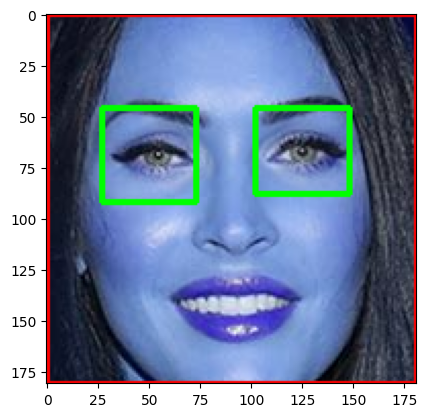

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray') # roi: region of interest, we are choosing to see the rectangle of the face now. which basically crops the image

In [12]:
def get_cropped_image_2eyes(image_path): # a function that returns only the images that are that have more than 2 eyes proper way
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

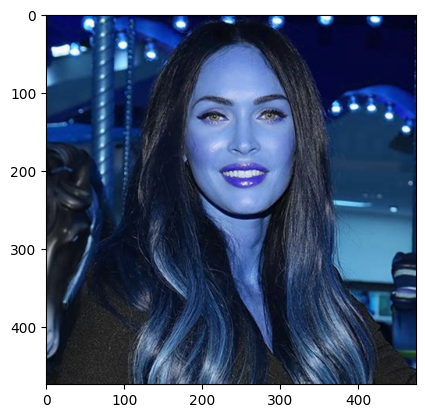

In [13]:
original_image = cv2.imread('./test _images/002_6e289116.jpg')
plt.imshow(original_image)

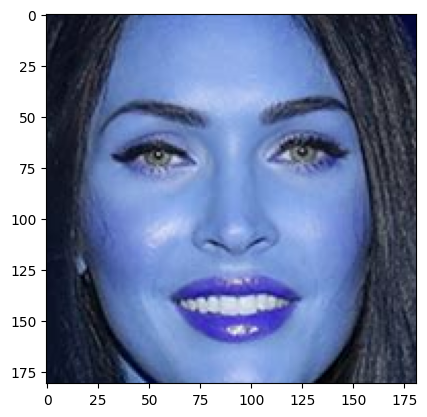

In [14]:
cropped_image = get_cropped_image_2eyes('./test _images/002_6e289116.jpg')
plt.imshow(cropped_image)

We want the function to only the photos that have 2 eyes in them

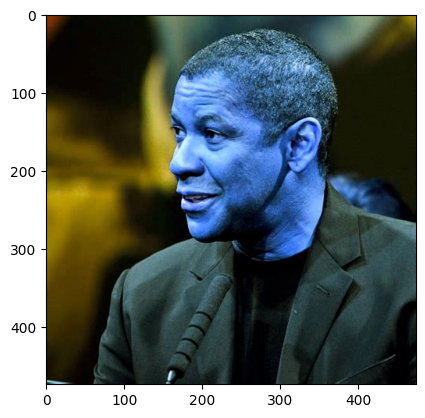

In [15]:
org_image = cv2.imread('./test _images/006_2880115c.jpg')
plt.imshow(org_image)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_2eyes('./test _images/001_9adc92c2.jpg')
cropped_image_no_2_eyes # the facial view is kind of obstructed and it can't detect the the other eye

In [17]:
path_to_data = "./dataset/Celebrity_Faces_Dataset/"
path_to_cr_data = "./dataset/Celebrity_Faces_Dataset/cropped/"

In [18]:
# it will go thorugh all the subdirectories in the celeb dataset folder
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs # they are folder names of the subdirectories are stored in this variables

['./dataset/Celebrity_Faces_Dataset/Angelina Jolie',
 './dataset/Celebrity_Faces_Dataset/Brad Pitt',
 './dataset/Celebrity_Faces_Dataset/cropped',
 './dataset/Celebrity_Faces_Dataset/Denzel Washington',
 './dataset/Celebrity_Faces_Dataset/Hugh Jackman',
 './dataset/Celebrity_Faces_Dataset/Jennifer Lawrence',
 './dataset/Celebrity_Faces_Dataset/Johnny Depp',
 './dataset/Celebrity_Faces_Dataset/Kate Winslet',
 './dataset/Celebrity_Faces_Dataset/Leonardo DiCaprio',
 './dataset/Celebrity_Faces_Dataset/Megan Fox',
 './dataset/Celebrity_Faces_Dataset/Natalie Portman',
 './dataset/Celebrity_Faces_Dataset/Nicole Kidman',
 './dataset/Celebrity_Faces_Dataset/Robert Downey Jr',
 './dataset/Celebrity_Faces_Dataset/Sandra Bullock',
 './dataset/Celebrity_Faces_Dataset/Scarlett Johansson',
 './dataset/Celebrity_Faces_Dataset/Tom Cruise',
 './dataset/Celebrity_Faces_Dataset/Tom Hanks',
 './dataset/Celebrity_Faces_Dataset/Will Smith']

In [20]:
import shutil 
if os.path.exists(path_to_cr_data): # if the folder exists
    shutil.rmtree(path_to_cr_data) # remove the folder
os.mkdir(path_to_cr_data) # create the folder

In [21]:
# I am going to iterate through the subdirectories

cropped_image_dirs = []
celebrity_files_names_dict = {} 

for img_dir in img_dirs:
    if img_dir == './dataset/Celebrity_Faces_Dataset/cropped':
        continue
    celebrity_name = img_dir.split('/')[-1] # get the different celebrity name from the folder name
    print(celebrity_name)
    count = 1

    celebrity_files_names_dict[celebrity_name] = [] # initializing, creating the list in the dictionary

    for entry in os.scandir(img_dir): # enter the folder
        roi_color = get_cropped_image_2eyes(entry.path) # get the proper pics with this function
        if roi_color is not None: # 
            cropped_folder = path_to_cr_data + celebrity_name # name a sub folder in the cropped folder with celb name
            if not os.path.exists(cropped_folder): # if it does not exist 
                os.makedirs(cropped_folder) # create it
                cropped_image_dirs.append(cropped_folder) # list of the sub cropped folder names
                print("Generating cropped images in folder: ", cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png" # i name the images one by one
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color) # save the image (roi_color) in the sub folder for celebs created in cropped folder
            celebrity_files_names_dict[celebrity_name].append(cropped_file_path) # i have to initialize the dictioanry
            count +=1

# lucky for me, my dataset is clean, meaning each pic has only one face and most of em are facing forward


Angelina Jolie
Generating cropped images in folder:  ./dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie
Brad Pitt
Generating cropped images in folder:  ./dataset/Celebrity_Faces_Dataset/cropped/Brad Pitt
Denzel Washington
Generating cropped images in folder:  ./dataset/Celebrity_Faces_Dataset/cropped/Denzel Washington
Hugh Jackman
Generating cropped images in folder:  ./dataset/Celebrity_Faces_Dataset/cropped/Hugh Jackman
Jennifer Lawrence
Generating cropped images in folder:  ./dataset/Celebrity_Faces_Dataset/cropped/Jennifer Lawrence
Johnny Depp
Generating cropped images in folder:  ./dataset/Celebrity_Faces_Dataset/cropped/Johnny Depp
Kate Winslet
Generating cropped images in folder:  ./dataset/Celebrity_Faces_Dataset/cropped/Kate Winslet
Leonardo DiCaprio
Generating cropped images in folder:  ./dataset/Celebrity_Faces_Dataset/cropped/Leonardo DiCaprio
Megan Fox
Generating cropped images in folder:  ./dataset/Celebrity_Faces_Dataset/cropped/Megan Fox
Natalie Portman
Generating

In [22]:
import pickle

with open("celebrity_files_names_dict.pkl", "wb") as file:
    pickle.dump(celebrity_files_names_dict, file)

In [ ]:
# this is what the celebrity_files_names_dict = {} looks like

{
    'lional_messi': [
        './datasets/cropped/messi/messi.png',
        './datasets/cropped/messi/messi_2.png',
    ],
    'Cristaino': [
        './datasets/cropped/cristiano/cristiano.png',
        './datasets/cropped/cristiano/cristiano_2.png',
    ],
}

Wavelet transformation allows you to extract important features from your image 

In [23]:
# wavelet transformation function
import numpy as np
import pywt
import cv2

# insert image, it will  transoform the image using pywt from wavelet. Then it will return a new image 
def w2d(img, mode="haar", level=1): 
    imArray = img
    #Datatype conversion
    #convert to gray scale
    imArray = cv2.cvtColor( imArray, cv2.COLOR_RGB2GRAY )
    # convert to float
    imArray = np.float32( imArray )
    imArray /= 255;
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    #Process_Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

# that is the wavelet transform which is crucial for the computers becasue it differentiates between different fucntions
# it becomes difficult for a classifer to idenitify an image that has multiple colors.
# this helps computer differentiate between images, cuz it goes to the details of the shape and size of the features of the face

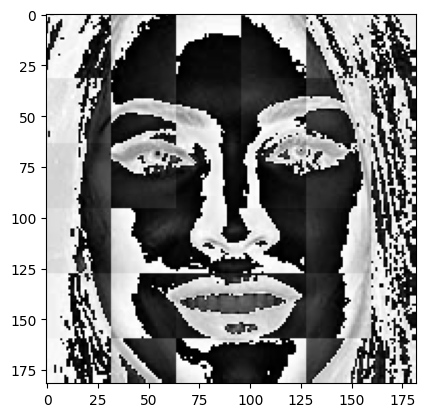

In [24]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [ ]:
celebrity_files_names_dict # key is the player name and values are the list of filepaths

{'Angelina Jolie': ['./dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie/Angelina Jolie1.png',
  './dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie/Angelina Jolie2.png',
  './dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie/Angelina Jolie3.png',
  './dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie/Angelina Jolie4.png',
  './dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie/Angelina Jolie5.png',
  './dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie/Angelina Jolie6.png',
  './dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie/Angelina Jolie7.png',
  './dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie/Angelina Jolie8.png',
  './dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie/Angelina Jolie9.png',
  './dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie/Angelina Jolie10.png',
  './dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie/Angelina Jolie11.png',
  './dataset/Celebrity_Faces_Dataset/cropped/Angelina Jolie/Angelina Jolie12.p

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_files_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict 

{'Angelina Jolie': 0,
 'Brad Pitt': 1,
 'Denzel Washington': 2,
 'Hugh Jackman': 3,
 'Jennifer Lawrence': 4,
 'Johnny Depp': 5,
 'Kate Winslet': 6,
 'Leonardo DiCaprio': 7,
 'Megan Fox': 8,
 'Natalie Portman': 9,
 'Nicole Kidman': 10,
 'Robert Downey Jr': 11,
 'Sandra Bullock': 12,
 'Scarlett Johansson': 13,
 'Tom Cruise': 14,
 'Tom Hanks': 15,
 'Will Smith': 16}

In [30]:
X = []
y = []

for celebrity_name, training_files in celebrity_files_names_dict.items(): # first loop will iterate thorugh the celeb
    for training_image in training_files: # 2nd loop will iterate through every image of the celeb

        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32,32)) #scaling the raw images to be the same size
        img_wav = w2d(img, 'db1', 5) # getting the wavelet image
        scaled_img_wav = cv2.resize(img_wav, (32, 32)) # scaling the wavelet images to be the same size
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_wav.reshape(32*32, 1))) # raw images has color, wavelet image does not
        X.append(combined_img)
        y.append(class_dict[celebrity_name])


In [34]:
len(X) # number of images

1376

In [32]:
len(X[0]) # = 32*32*3 + 32*32, pixel of each image

4096

In [33]:
X = np.array(X).reshape(len(X),4096).astype(float) # converting the int to float to avoid errors
X.shape

(1376, 4096)

In [35]:
X[0]

array([249., 228., 226., ...,   3., 243., 227.], shape=(4096,))

In [37]:
import pickle

with open("X.pkl", "wb") as file:
    pickle.dump(X, file)

with open("y.pkl", "wb") as file:
    pickle.dump(y, file)


In [ ]:
# with open("X.pkl", "rb") as file:
#     loaded_list = pickle.load(file)
# print(loaded_list)